### Basic Financial Mathematics
* Time value of money

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
FV = 50000 #Future value
r = 0.05 # Rate of return
T = 1 # Times compounded - 1 year in this case
PV = FV/(1+r) ** T
print(round(PV,2))

47619.05


In [5]:
# Lets functionlaize this
def present_value(FV, r, T):
    return round(FV/(1+r) ** T,2)

In [12]:
# Let's say we won the lottery
# 1 million dollars
#We have a cashflow
cashflow = np.ones(20) * 50000
cashflows = cashflow
for year in range(len(cashflow)): 
    cashflows[year] = present_value(cashflow[year],r, year)

In [13]:
cashflows

array([50000.  , 47619.05, 45351.47, 43191.88, 41135.12, 39176.31,
       37310.77, 35534.07, 33841.97, 32230.45, 30695.66, 29233.96,
       27841.87, 26516.07, 25253.4 , 24050.85, 22905.58, 21814.83,
       20776.03, 19786.7 ])

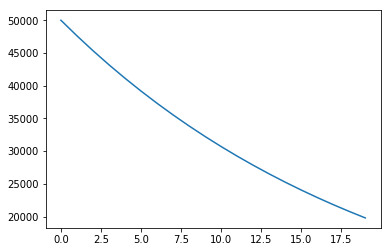

In [20]:
plt.plot(cashflows)

In [22]:
print("This is actually worth {} when adjusted for interest".format(round(sum(cashflows),2)))

This is actually worth 654266.04 when adjusted for interest


Future values

In [25]:
def future_value(pv, r, T):
    return round((pv*(1+r)**T),2)

In [26]:
ending_balance = np.ones(20)*50000
for T in range(1,len(ending_balance)):
    ending_balance[T] = future_value(ending_balance[T], 0.05, T)
print(ending_balance)

[ 50000.    52500.    55125.    57881.25  60775.31  63814.08  67004.78
  70355.02  73872.77  77566.41  81444.73  85516.97  89792.82  94282.46
  98996.58 103946.41 109143.73 114600.92 120330.96 126347.51]


([<matplotlib.axis.XTick at 0x11c80aac8>,
 <a list of 5 Text xticklabel objects>)

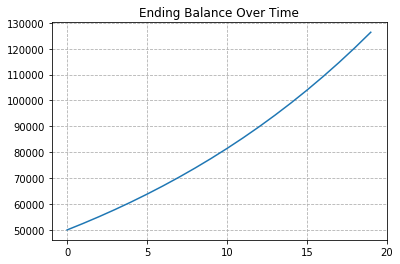

In [29]:
plt.plot(ending_balance)
plt.title("Ending Balance Over Time")
plt.grid(linestyle='--')
plt.xticks([0,5,10,15,20])

Remember, rates of returns can change, lets see how it works!

In [31]:
np.random.normal(0.095, 0.185)
# Fist part is expected return, with an 18.5% standard deviation (volutility)

0.15026134039824773

In [32]:
#Let's see how this works in our model
ending_balance = np.ones(20)*50000
for T in range(len(ending_balance)):
    r = np.random.normal(0.095, 0.185)
    if T>0:
        ending_balance[T] = future_value(ending_balance[T],r,T)
    else:
        ending_balance[T] = ending_balance[T]
print(ending_balance)

[ 50000.    50184.63  97270.05  38283.07 127757.21 514506.95 117383.27
  19741.31  95384.28 473856.87 174027.57 266469.92 461415.05 123970.91
 601867.25 888859.91 147870.07  45417.13 179064.72 482730.82]


([<matplotlib.axis.XTick at 0x11c521390>,
 <a list of 5 Text xticklabel objects>)

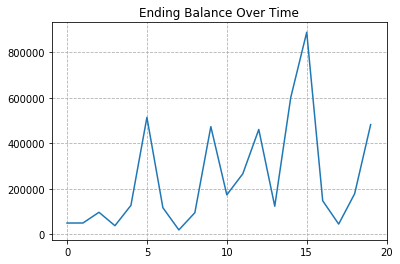

In [34]:
# Looks like we had a horirble investing strategy
# Results may vary
plt.plot(ending_balance)
plt.title("Ending Balance Over Time")
plt.grid(linestyle='--')
plt.xticks([0,5,10,15,20])

In [40]:
# Numpy and Scipy financial Calculators
np.fv(0.05,1,-500,-50000, when='begin') # Rememebr the BA2+
# the 500 there is the cashflows

53025.0

### NVP and Multiple cashflows

In [50]:
init_investment = -100000
cost_of_cap = 0.12
years = np.arange(1,6)
cashflows=  np.ones(5)* 30000

In [51]:
discounted_cashflows = cashflows/(1+cost_of_cap)**years

In [52]:
discounted_cashflows

array([26785.71428571, 23915.81632653, 21353.4074344 , 19065.54235214,
       17022.80567156])

In [53]:
npv = sum(discounted_cashflows)-init_investment
npv

208143.28607035015

npv tells you what this value is at your cost of capital, if its positive it means you made 8k above the 12% so it's acceptable!
NPV ≥ 0 could be concidered

In [54]:
np.npv(cost_of_cap,cashflows)

121120.48039879216

### Skipping IRR right to Moving Average forecasting

In [59]:
import quandl
import datetime

In [60]:
start = datetime.datetime(2007,1,1)
end = datetime.datetime(2013,12,31)

In [62]:
APPL = quandl.get("WIKI/" + 'AAPL', start_date= start,end_date = end)

In [64]:
APPL.head()
AAPL = APPL

In [65]:
AAPL['5-day'] = AAPL['Close'].rolling(5).mean()
AAPL.head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,5-day
Date,,,,,,,,,,,,,
2007-01-03,86.29,86.58,81.90,83.80,44225700.0,0.0,1.0,11.089468,11.126737,10.525291,10.769468,309579900.0,NaN
2007-01-04,84.05,85.95,83.82,85.66,30259300.0,0.0,1.0,10.801596,11.045773,10.772038,11.008504,211815100.0,NaN
2007-01-05,85.77,86.20,84.40,85.05,29812200.0,0.0,1.0,11.022640,11.077901,10.846576,10.930110,208685400.0,NaN
2007-01-08,85.96,86.53,85.28,85.47,28468100.0,0.0,1.0,11.047058,11.120311,10.959669,10.984086,199276700.0,NaN
2007-01-09,86.45,92.98,85.15,92.57,119617800.0,0.0,1.0,11.110030,11.949226,10.942962,11.896535,837324600.0,86.510
2007-01-10,94.75,97.80,93.45,97.00,105460000.0,0.0,1.0,12.176696,12.568663,12.009627,12.465852,738220000.0,89.150
2007-01-11,95.94,96.78,95.10,95.80,51437600.0,0.0,1.0,12.329627,12.437579,12.221675,12.311635,360063200.0,91.178
2007-01-12,94.59,95.06,93.23,94.62,46881800.0,0.0,1.0,12.156133,12.216535,11.981354,12.159989,328172600.0,93.092
2007-01-16,95.68,97.25,95.45,97.10,44431300.0,0.0,1.0,12.296214,12.497980,12.266655,12.478703,311019100.0,95.418


/Users/anthonyplata/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


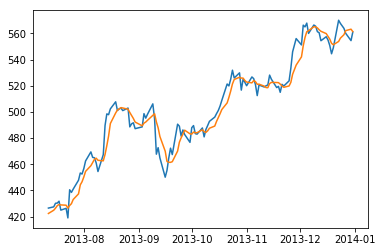

In [66]:
plt.plot(AAPL['Close'][-120:])
plt.plot(AAPL['5-day'][-120:])

In [67]:
# Mean absolute deviation
AAPL['MAD'] =  np.abs(AAPL['Close']-AAPL['5-day'])

In [68]:
AAPL['MAD'].mean()

4.892003185437929

In [69]:
# Off by around 5 bucks, 

In [71]:
# Mean Percent Error -- Accounting for scaling of data you're looking at
AAPL['MPE'] = AAPL['MAD'] / AAPL['Close']
AAPL['MPE'].mean()

0.018262034949128026

In [72]:
# OFF by around 2% on average
#Mean Square Error
AAPL['MSE'] = AAPL['MAD']**2
MSE = AAPL['MSE'].mean()
MSE

48.17290108192425

In [75]:
RMSE = np.sqrt(MSE)
print(RMSE) # OFf by around 7 dollars

6.940670074418193
